In [2]:
import os
import pandas as pd
# result 폴더 경로 지정
base_path = "result/확실성_불확실"

# CSV 파일들을 담을 리스트
csv_list = []

# result 폴더 내부 순회
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith(".csv"):  # CSV 파일만 선택
            file_path = os.path.join(root, file)
            print(f"불러오는 중: {file_path}")
            df = pd.read_csv(file_path)
            csv_list.append(df)

# 모든 CSV 파일 합치기
merged_df = pd.concat(csv_list, ignore_index=True)

# 합쳐진 CSV 저장
merged_df.to_csv("result_확실성_불확실.csv", index=False, encoding="utf-8-sig")

print("모든 CSV 파일이 merged_result.csv 로 저장되었습니다.")

불러오는 중: result/확실성_불확실\result_확실성_불확실.csv
모든 CSV 파일이 merged_result.csv 로 저장되었습니다.


In [14]:
df = pd.read_csv("merged_result.csv")
df

,index,user_prompt,유형,유형_예측,극성,극성_예측,시제,시제_예측,확실성,확실성_예측
0,0,이러한 선거제도는 정당 득표율과 의석수가 비례하지 않고 사표(死票)가 발생하는 등 ...,대화형,추론형,긍정,부정,과거,과거,불확실,불확실
1,1,그들은 왜 그렇게 국적을 지키고 싶었을까.,대화형,대화형,긍정,긍정,과거,현재,불확실,불확실
2,2,문 대통령이 사전에도 없는 애매한 ＇고용 연장＇을 꺼내 말하고 싶었던 것은 이게 아...,대화형,추론형,긍정,긍정,과거,과거,불확실,불확실
3,3,두 사람의 공기 작업은 어떻게 시작됐을까.,대화형,대화형,긍정,긍정,과거,과거,불확실,불확실
4,4,웨지의 그루브가 한 달이면 닳아 없어질 정도로 많은 시간을 투자했다죠.,대화형,추론형,긍정,긍정,과거,과거,불확실,확실
...,...,...,...,...,...,...,...,...,...,...
968,0,＂OTT 사업을 처음부터 직접 키우려 했다면 쿠팡플레이의 ＇타임 투 마켓(Time ...,예측형,추론형,부정,긍정,과거,과거,확실,불확실
969,0,신종 코로나바이러스 감염증(우한 폐렴) 사태 수습과 내수 정상화에 힘써야 할 중국이...,예측형,추론형,부정,부정,미래,미래,불확실,불확실
970,1,확실히 백내장 진단을 받았어도 입원 치료를 받을 만큼 특별한 상황이었음을 입증하지 ...,예측형,추론형,부정,부정,미래,미래,불확실,불확실
971,2,"결국 국내 은행들은 상대적으로 손쉬운 이자 장사에만 다시 몰두할 것이고, 외국인 투...",예측형,추론형,부정,부정,미래,미래,불확실,확실


In [15]:
neg_df = df[df["극성"] == "부정"]

In [16]:
neg_df.to_csv('부정.csv', index=False, encoding="utf-8-sig")

In [54]:
df_유형 = df[['user_prompt','유형','유형_예측']]
df_극성 = df[['user_prompt','극성', '극성_예측']]
df_시제 = df[['user_prompt','시제', '시제_예측']]
df_확실성 = df[['user_prompt','확실성', '확실성_예측']]

In [55]:
df_유형 = df_유형[df_유형["유형"] != df_유형["유형_예측"]]
df_극성 = df_극성[df_극성["극성"] != df_극성["극성_예측"]]
df_시제 = df_시제[df_시제["시제"] != df_시제["시제_예측"]]
df_확실성 = df_확실성[df_확실성["확실성"] != df_확실성["확실성_예측"]]

In [ ]:
a = pd.read_csv("대화형.csv")
a

,user_prompt,유형,극성,시제,확실성
0,구글도 1090억달러(2018년 말)에서 1197억달러(2019년 말)로 현금을 높...,대화형,긍정,과거,확실
1,제 눈에는 실리콘밸리 IT 기업들은 위기가 왔을 때 이를 기회로 바꾸기 위해 준비를...,대화형,긍정,현재,확실
2,＂그런데 이번엔 계획할 수 없는 너무 큰 이벤트를 맞이하게 돼서 행복해요.＂,대화형,긍정,현재,확실
3,＇위기는 곧 기회＇라는 격언은 이제 너무나 보편화되어서 모르는 사람이 없을 정도입니다.,대화형,긍정,현재,확실
4,＂저는 봉준호의 진화를 20년 동안 봐왔어요.＂,대화형,긍정,현재,확실
...,...,...,...,...,...
570,＂환자 입장에서 편의성이나 안전성 등은 어떤가?＂,대화형,미정,현재,불확실
571,＂아마추어 골퍼들이 클럽을 놓지 못하고 붙잡기 때문에 정확한 임팩트가 나오지 않는다...,대화형,긍정,현재,확실
572,운영 권한을 얻지는 못했지만 실제 자금줄을 보탠 일반 투자자들은 얼마나 정확하고 투...,대화형,긍정,현재,불확실
573,"그 결과 ＇별들의 전쟁＇에서 페덱스컵 랭킹 1위, 상금 랭킹 2위라는 놀라운 성적을...",대화형,긍정,현재,확실


In [12]:
a.to_csv("대화형.csv", index=False, encoding="utf-8-sig")

In [56]:
df_유형

,user_prompt,유형,유형_예측
0,이러한 선거제도는 정당 득표율과 의석수가 비례하지 않고 사표(死票)가 발생하는 등 ...,대화형,추론형
2,문 대통령이 사전에도 없는 애매한 ＇고용 연장＇을 꺼내 말하고 싶었던 것은 이게 아...,대화형,추론형
4,웨지의 그루브가 한 달이면 닳아 없어질 정도로 많은 시간을 투자했다죠.,대화형,추론형
6,＂그때 제가 했던 수상 소감은 때늦은 게 아니었나 싶어요.＂,대화형,추론형
7,2013년부터 2019년까지 401K 수익률은 연평균 9.49%나 된다네요.,대화형,사실형
...,...,...,...
1384,다만 상황이 좋지 못하다.,추론형,사실형
1386,"울산바위의 정상이라는 게 보통의 산 정상석에 있는, 그야말로 산의 꼭짓점을 뜻하는 ...",추론형,사실형
1389,한다 빅오픈에서 우승하지는 못했지만 준우승을 차지하며 샷 감각을 끌어올린 터라 갑자...,추론형,사실형
1390,지난해 하반기 누구보다 뜨거운 샷을 날렸던 김세영도 여유롭지 못하다.,추론형,사실형


In [38]:
df = pd.read_csv('result/대화형_수정5/result_대화형.csv')

In [39]:
# 분석할 컬럼 쌍
pairs = [
    ("유형", "유형_예측"),
    ("극성", "극성_예측"),
    ("시제", "시제_예측"),
    ("확실성", "확실성_예측")
]

with open("result/대화형_수정5/analysis_result.txt", "w", encoding="utf-8") as f:
    for true_col, pred_col in pairs:
        f.write(f"\n=== {true_col} 오답/정답 분포 ===\n")
        
        # (정답, 예측) 조합별 개수
        pattern = (
            df.groupby([true_col, pred_col])
            .size()
            .reset_index(name="count")
            .sort_values("count", ascending=False)
        )
        
        # 전체 데이터 기준 비율
        pattern["비율(%)"] = pattern["count"] / len(df) * 100
        
        # DataFrame을 문자열로 변환해서 저장
        f.write(pattern.to_string(index=False))
        f.write("\n" + "-"*50 + "\n")

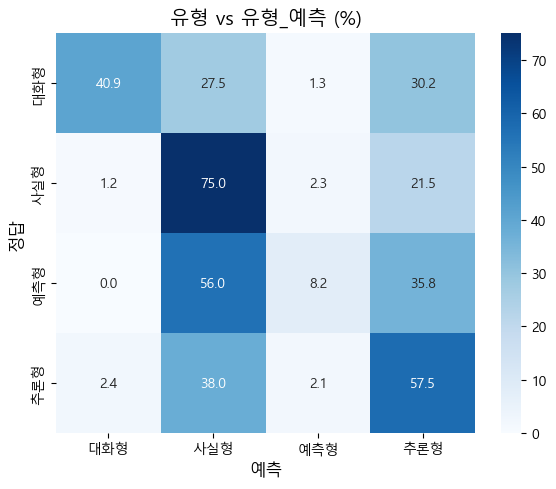

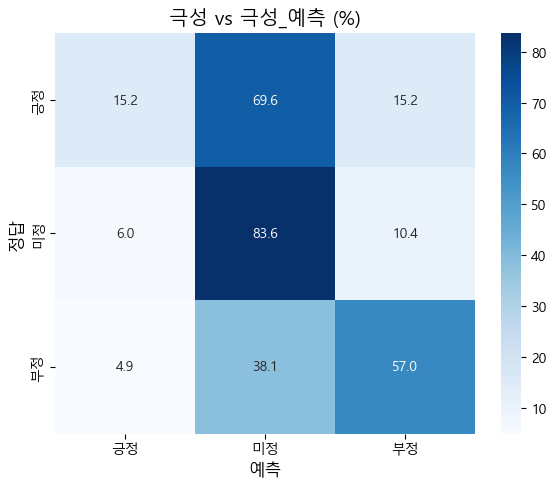

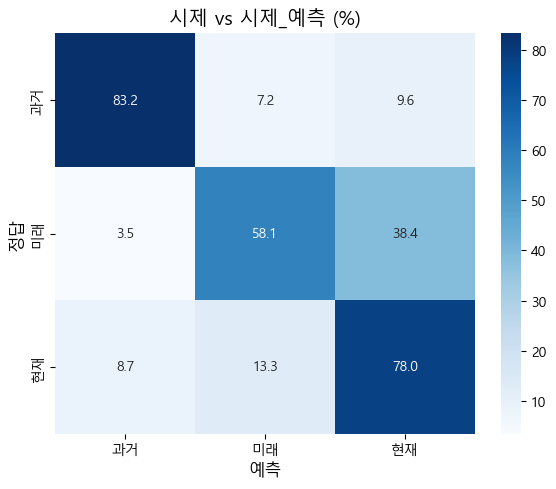

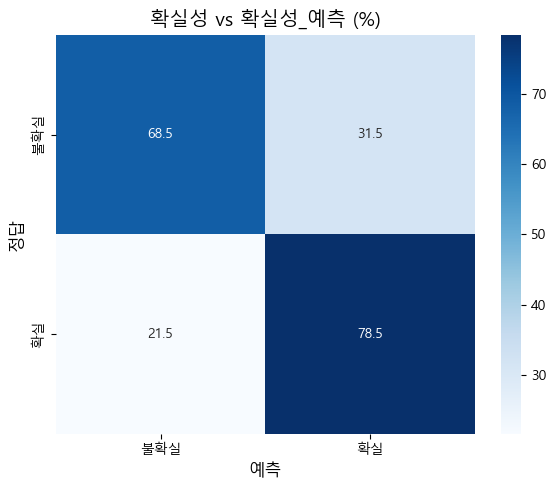

In [60]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

plt.rc("font", family="Malgun Gothic")

for true_col, pred_col in pairs:
    plt.figure(figsize=(6,5))

    # 혼동 행렬 (정답 기준 비율 %)
    cm = pd.crosstab(df[true_col], df[pred_col], normalize="index") * 100

    # 히트맵 그리기
    sns.heatmap(cm, annot=True, fmt=".1f", cmap="Blues", cbar=True)

    plt.title(f"{true_col} vs {pred_col} (%)", fontsize=14)
    plt.ylabel("정답", fontsize=12)
    plt.xlabel("예측", fontsize=12)
    plt.tight_layout()
    plt.show()